**Early stage Diabetes Risk prediction**


#Importing necessary libraries

In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix
%matplotlib inline

** Dataset**

In [207]:
dataset = pd.read_csv('Project4-diabetes_data.csv')
dataset.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


**Checking whether dataset has null values**

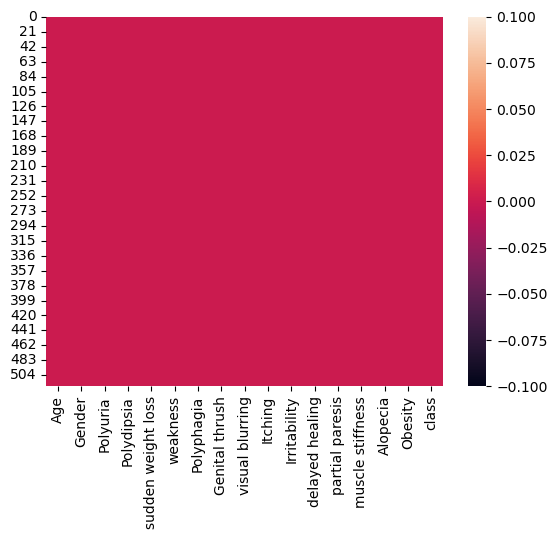

In [209]:
sns.heatmap(dataset.isnull())
plt.show()

In [210]:
dataset['class'].value_counts()

class
Positive    320
Negative    200
Name: count, dtype: int64

**Mapping text into values**

In [212]:
dataset['Gender'] = dataset['Gender'].map({'Male':1,'Female':0})
dataset['class'] = dataset['class'].map({'Positive':1,'Negative':0})
dataset['Polyuria'] = dataset['Polyuria'].map({'Yes':1,'No':0})
dataset['Polydipsia'] = dataset['Polydipsia'].map({'Yes':1,'No':0})
dataset['sudden weight loss'] = dataset['sudden weight loss'].map({'Yes':1,'No':0})
dataset['weakness'] = dataset['weakness'].map({'Yes':1,'No':0})
dataset['Polyphagia'] = dataset['Polyphagia'].map({'Yes':1,'No':0})
dataset['Genital thrush'] = dataset['Genital thrush'].map({'Yes':1,'No':0})
dataset['visual blurring'] = dataset['visual blurring'].map({'Yes':1,'No':0})
dataset['Itching'] = dataset['Itching'].map({'Yes':1,'No':0})
dataset['Irritability'] = dataset['Irritability'].map({'Yes':1,'No':0})
dataset['delayed healing'] = dataset['delayed healing'].map({'Yes':1,'No':0})
dataset['partial paresis'] = dataset['partial paresis'].map({'Yes':1,'No':0})
dataset['muscle stiffness'] = dataset['muscle stiffness'].map({'Yes':1,'No':0})
dataset['Alopecia'] = dataset['Alopecia'].map({'Yes':1,'No':0})
dataset['Obesity'] = dataset['Obesity'].map({'Yes':1,'No':0})

# Exploratory Data Analysis

In [215]:
corrdata = dataset.corr()

In [216]:
sns.histplot(dataset['Age'],bins=30)  

<Axes: xlabel='Age', ylabel='Count'>

**Age**

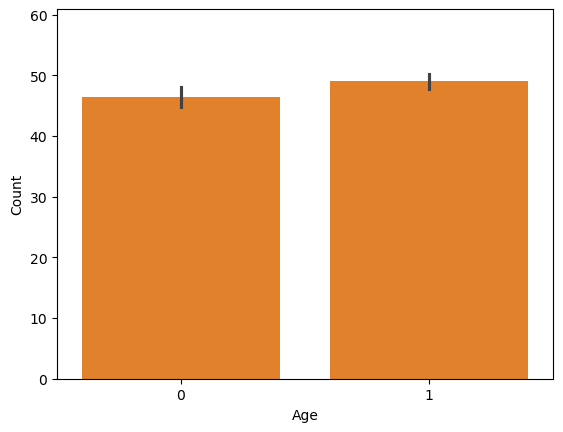

In [218]:
sns.barplot(x='class',y='Age',data=dataset)
plt.show()

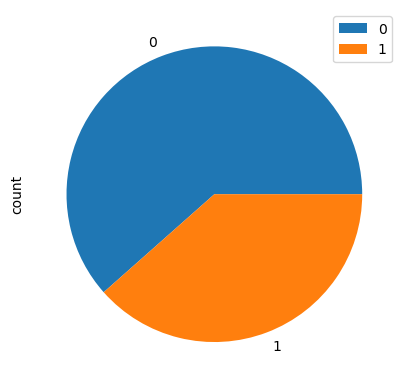

In [219]:
ds = dataset['class'].value_counts().reset_index()
ds.columns = ['class', 'count']
plot=ds.plot.pie(y='count')
plt.show()

**Gender**

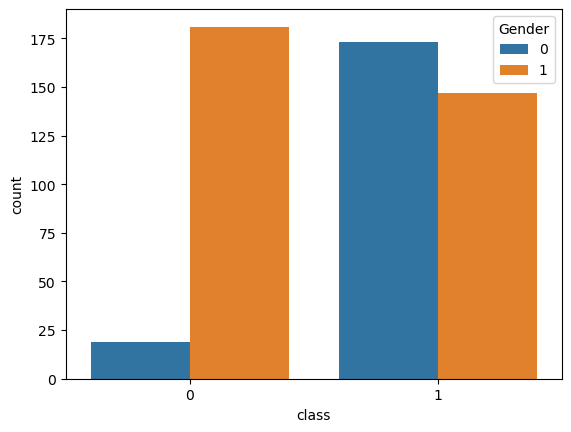

In [221]:
sns.countplot(x='class',data=dataset,hue='Gender')
plt.show()

**Polyuria**

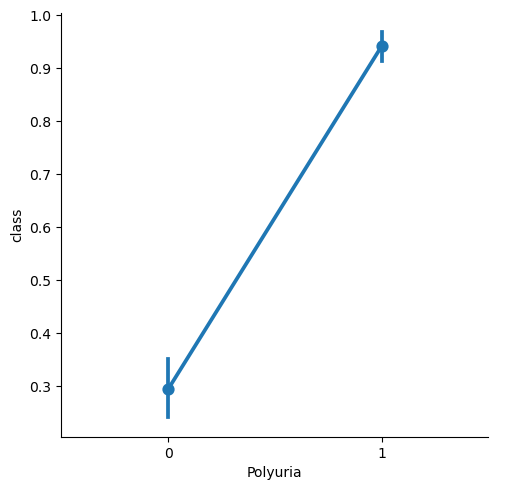

In [223]:
sns.catplot(x="Polyuria", y="class", kind="point", data=dataset)
plt.show()

**Polydipsia**

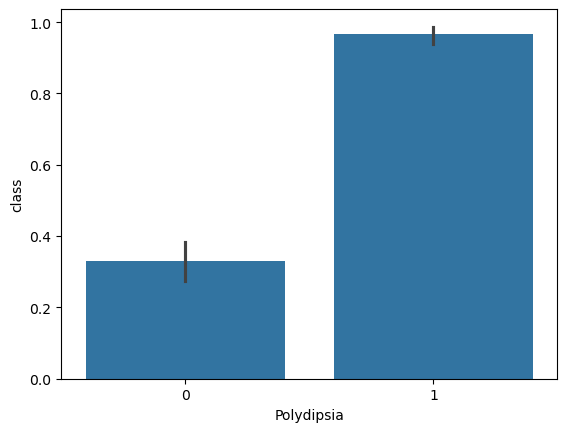

In [225]:
sns.barplot(x='Polydipsia',y='class',data=dataset)
plt.show()

**Sudden weight loss**

In [227]:
sns.countplot(x='class',data=dataset,hue='sudden weight loss')

<Axes: xlabel='class', ylabel='count'>

**Polyphagia**

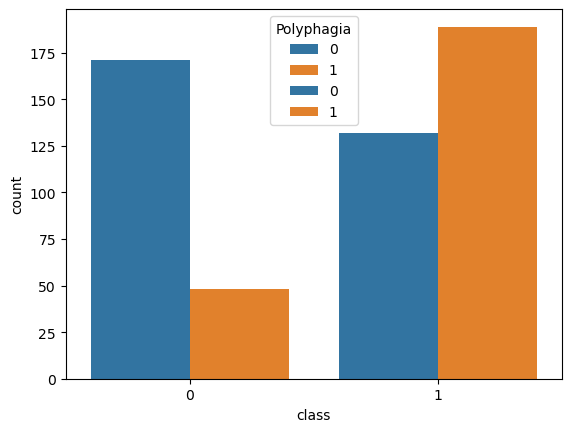

In [229]:
sns.countplot(x='class',data=dataset, hue='Polyphagia')
plt.show()

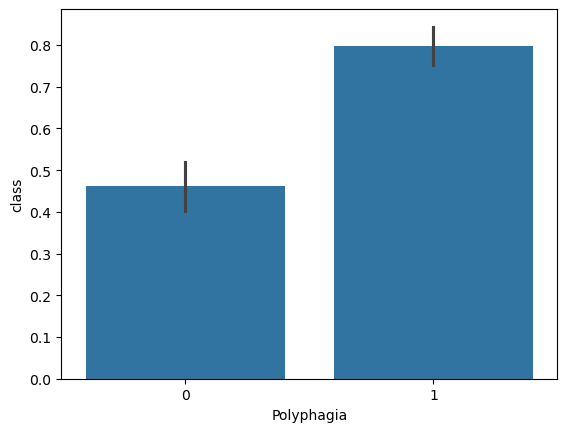

In [230]:
sns.barplot(x='Polyphagia',y='class',data=dataset)
plt.show()

**Genital Thrush**

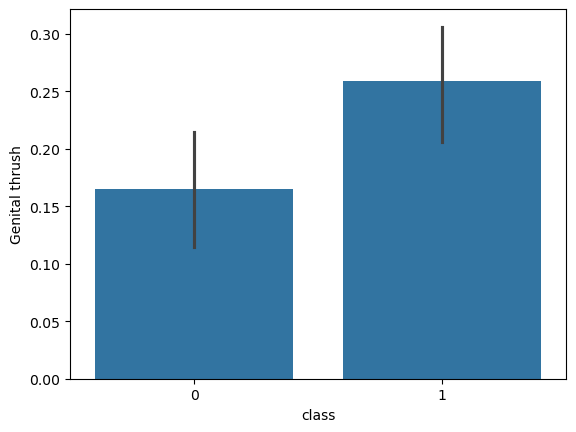

In [232]:
sns.barplot(x='class',y='Genital thrush',data=dataset)
plt.show()

**Partial paresis**

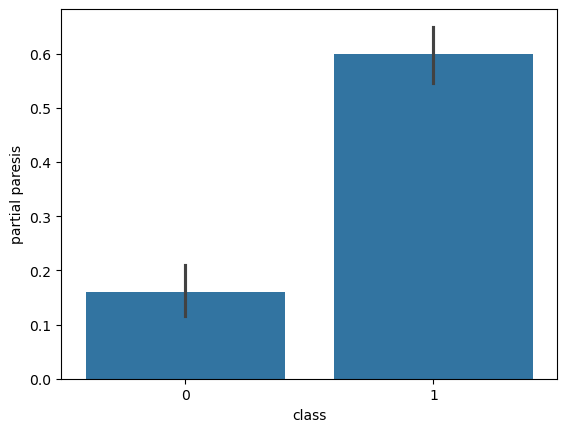

In [234]:
sns.barplot(x='class',y='partial paresis',data=dataset)
plt.show()

**Alopecia**

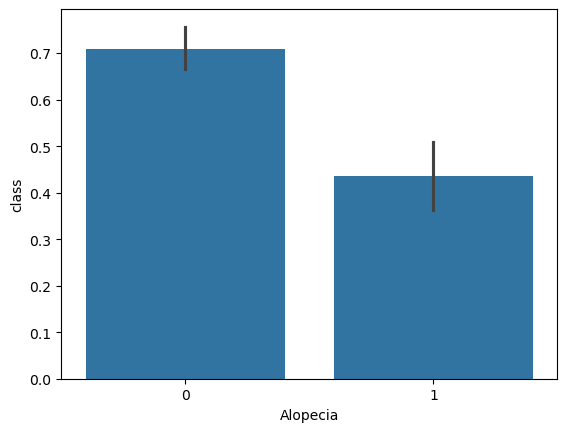

In [236]:
sns.barplot(x='Alopecia',y='class',data=dataset)
plt.show()

**Visual blurring**

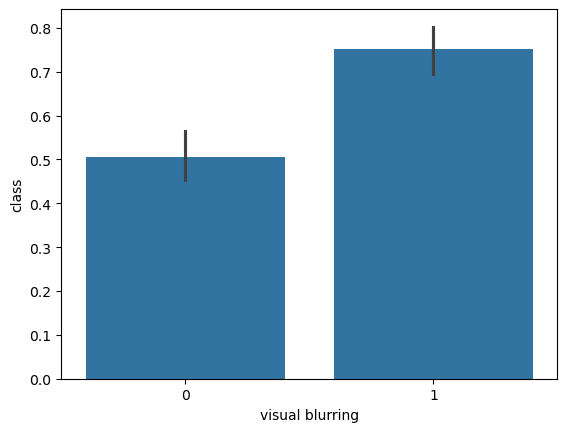

In [238]:
sns.barplot(x="visual blurring", y="class", data=dataset)
plt.show()

**Itching**

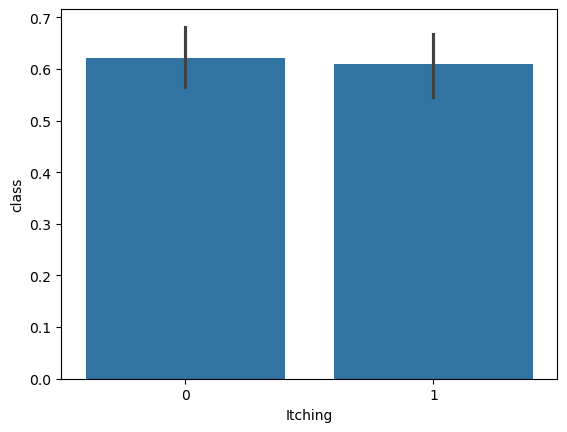

In [240]:
sns.barplot(x="Itching", y="class", data=dataset)
plt.show()

**Obesity**

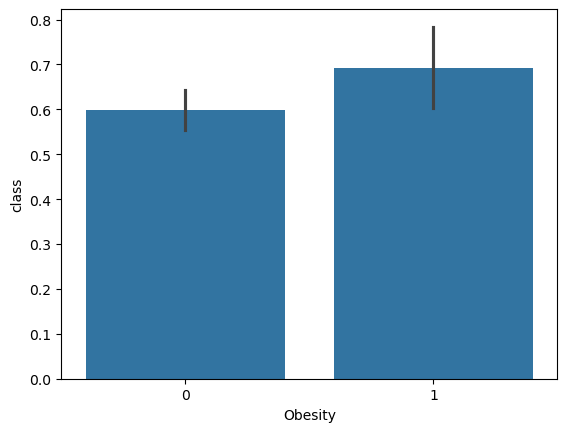

In [242]:
sns.barplot(x='Obesity',y='class',data=dataset)
plt.show()

**Irritability**

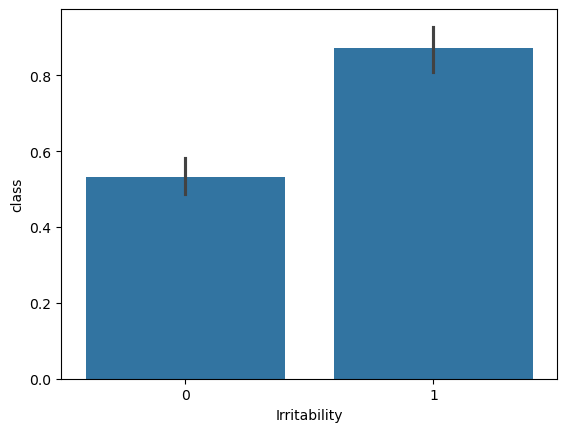

In [244]:
sns.barplot(x='Irritability',y='class',data=dataset)
plt.show()

In [245]:
X1 = dataset.iloc[:,0:-1]
y1 = dataset.iloc[:,-1]

In [246]:
X1.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')

**Feature selection using selectkbest**

In [248]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
best_feature = SelectKBest(score_func=chi2,k=10)
fit = best_feature.fit(X1,y1)

In [249]:
dataset_scores = pd.DataFrame(fit.scores_)
dataset_cols = pd.DataFrame(X1.columns)

In [250]:
featurescores = pd.concat([dataset_cols,dataset_scores],axis=1)
featurescores.columns=['column','scores']

**These are the variables with their feature scores ,their importance/contribution towards class**

In [252]:
featurescores

,column,scores
0,Age,18.845767
1,Gender,38.747637
2,Polyuria,116.184593
3,Polydipsia,120.785515
4,sudden weight loss,57.749309
5,weakness,12.724262
6,Polyphagia,33.198418
7,Genital thrush,4.914009
8,visual blurring,18.124571
9,Itching,0.047826


**Top 10 features**

In [254]:
print(featurescores.nlargest(10,'scores'))

                column      scores
3           Polydipsia  120.785515
2             Polyuria  116.184593
4   sudden weight loss   57.749309
12     partial paresis   55.314286
1               Gender   38.747637
10        Irritability   35.334127
6           Polyphagia   33.198418
14            Alopecia   24.402793
0                  Age   18.845767
8      visual blurring   18.124571


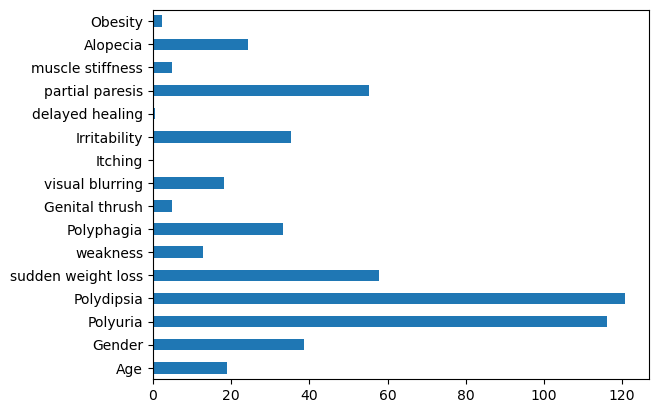

In [255]:
featureview=pd.Series(fit.scores_, index=X1.columns)
featureview.plot(kind='barh')
plt.show()

**Checking the variance**

In [257]:
from sklearn.feature_selection import VarianceThreshold
feature_high_variance = VarianceThreshold(threshold=(0.5*(1-0.5)))
falls=feature_high_variance.fit(X1)

In [258]:
dataset_scores1 = pd.DataFrame(falls.variances_)
dat1 = pd.DataFrame(X1.columns)



In [259]:
high_variance = pd.concat([dataset_scores1,dat1],axis=1)
high_variance.columns=['variance','cols']

In [260]:
high_variance[high_variance['variance']>0.2]

,variance,cols
0,147.374168,Age
1,0.232899,Gender
2,0.249985,Polyuria
3,0.247304,Polydipsia
4,0.243162,sudden weight loss
5,0.242511,weakness
6,0.248044,Polyphagia
8,0.247304,visual blurring
9,0.249819,Itching
11,0.248369,delayed healing


In [261]:
X = dataset[['Polydipsia','sudden weight loss','partial paresis','Irritability','Polyphagia','Age','visual blurring']]
y = dataset['class']

**Splitting the dataset into training and testing sets**

In [263]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

**Standardization of independant variables**

In [265]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# Logistic Regression

In [267]:

from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

**Cross validation test for training data**

In [269]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=lg, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("standard deviation is {:.2f} %".format(accuracies.std()*100))


accuracy is 84.61 %
standard deviation is 5.32 %


**Prediction**

In [271]:
pre=lg.predict(X_test)

** Confusion matrix**

In [273]:
logistic_regression=accuracy_score(pre,y_test)
print("accuracy score:",)
print(accuracy_score(pre,y_test))
print("Confusion Matrix:",)
print(confusion_matrix(pre,y_test))




accuracy score:
0.8942307692307693
Confusion Matrix:
[[34  5]
 [ 6 59]]


In [274]:
from sklearn.metrics import classification_report
print(classification_report(pre,y_test))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        39
           1       0.92      0.91      0.91        65

    accuracy                           0.89       104
   macro avg       0.89      0.89      0.89       104
weighted avg       0.89      0.89      0.89       104



# SVM

In [276]:
from sklearn.svm import SVC
sv=SVC(kernel='linear',random_state=0)
sv.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [277]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=sv, X=X_train ,y=y_train,cv=10)
print(" mean accuracy is {:.2f} %".format(accuracies.mean()*100))
print("standrd deviation is {:.2f} %".format(accuracies.std()*100))


 mean accuracy is 83.18 %
standrd deviation is 4.94 %


In [278]:
pre1=sv.predict(X_test)

In [279]:
svm_linear=accuracy_score(pre1,y_test)
print("accuracy score:",)
print(accuracy_score(pre1,y_test))
print("Confusion Matrix:",)
print(confusion_matrix(pre1,y_test))

accuracy score:
0.9038461538461539
Confusion Matrix:
[[34  4]
 [ 6 60]]


In [280]:
from sklearn.metrics import classification_report
print(classification_report(pre1,y_test))



              precision    recall  f1-score   support

           0       0.85      0.89      0.87        38
           1       0.94      0.91      0.92        66

    accuracy                           0.90       104
   macro avg       0.89      0.90      0.90       104
weighted avg       0.91      0.90      0.90       104



In [281]:

from sklearn.svm import SVC
svrf=SVC(kernel='rbf',random_state=0)
svrf.fit(X_train,y_train)

SVC(random_state=0)

In [282]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=svrf, X=X_train ,y=y_train,cv=10)
print("mean accuracy is {:.2f} %".format(accuracies.mean()*100))
print("standard deviation is {:.2f} %".format(accuracies.std()*100))


mean accuracy is 88.47 %
standard deviation is 3.69 %


In [283]:
pre2=svrf.predict(X_test)

In [284]:
svm_rbf=accuracy_score(pre2,y_test)
print(accuracy_score(pre2,y_test))
print(confusion_matrix(pre2,y_test))

0.9807692307692307
[[39  1]
 [ 1 63]]


In [285]:
from sklearn.metrics import classification_report
print(classification_report(pre2,y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.98      0.98      0.98        64

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



# KNN

In [287]:
from sklearn.neighbors import KNeighborsClassifier
score=[]

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i, metric='minkowski', p=2)
    knn.fit(X_train, y_train)
    pre3 = knn.predict(X_test)
    ans = accuracy_score(y_test, pre3)  # Ensure y_test is the true labels
    print("Accuracy score {}: {}".format(i, round(100 * ans, 2)))
    score.append(round(100 * ans, 2))


print("Top 5 accuracy scores:", sorted(score, reverse=True)[:5])


best_score = sorted(score, reverse=True)[:1]
print("Best accuracy score:", best_score)


Accuracy score 1: 98.08
Accuracy score 2: 98.08
Accuracy score 3: 98.08
Accuracy score 4: 98.08
Accuracy score 5: 96.15
Accuracy score 6: 95.19
Accuracy score 7: 97.12
Accuracy score 8: 95.19
Accuracy score 9: 96.15
Top 5 accuracy scores: [98.08, 98.08, 98.08, 98.08, 97.12]
Best accuracy score: [98.08]


# Naive bayes-Gaussian NB

In [289]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(X_train,y_train)

GaussianNB()

In [290]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=gb, X=X_train ,y=y_train,cv=10)
print("Mean accuracy is {:.2f} %".format(accuracies.mean()*100))
print("standard Deviation is {:.2f} %".format(accuracies.std()*100))

Mean accuracy is 82.94 %
standard Deviation is 8.03 %


In [291]:
pre4=gb.predict(X_test)

In [292]:
Naive_bayes_Gaussian_nb=accuracy_score(pre4,y_test)
print("accuracy score:",)
print(accuracy_score(pre4,y_test))
print("Confusion Matrix:",)
print(confusion_matrix(pre4,y_test))

accuracy score:
0.8557692307692307
Confusion Matrix:
[[32  7]
 [ 8 57]]


In [293]:
from sklearn.metrics import classification_report
print(classification_report(pre4,y_test))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81        39
           1       0.89      0.88      0.88        65

    accuracy                           0.86       104
   macro avg       0.85      0.85      0.85       104
weighted avg       0.86      0.86      0.86       104



# Decision Tress Classifier

In [295]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(criterion='gini')
dc.fit(X_train,y_train)

DecisionTreeClassifier()

In [296]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=dc, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 91.11 %
std is 4.02 %


In [297]:
pre5=dc.predict(X_test)

In [298]:
Decisiontress_classifier=accuracy_score(pre5,y_test)
print("accuracy score:",)
print(accuracy_score(pre5,y_test))
print("Confusion Matrix:",)
print(confusion_matrix(pre5,y_test))

accuracy score:
0.9615384615384616
Confusion Matrix:
[[38  2]
 [ 2 62]]


In [299]:
from sklearn.metrics import classification_report
print(classification_report(pre5,y_test))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        40
           1       0.97      0.97      0.97        64

    accuracy                           0.96       104
   macro avg       0.96      0.96      0.96       104
weighted avg       0.96      0.96      0.96       104



# Random Forest Classifier

In [301]:
from sklearn.ensemble import RandomForestClassifier
estime=[]
for i in range(1,100):
    rc=RandomForestClassifier(n_estimators=i,criterion='entropy',random_state=0)
    rc.fit(X_train,y_train)
    

In [302]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=rc, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 89.90 %
std is 5.60 %


In [303]:
pre6 = rc.predict(X_test)

In [304]:
Random_forest=accuracy_score(pre6,y_test)
print("accuracy score:",)
print(accuracy_score(pre6,y_test))
print("Confusion Matrix:",)
print(confusion_matrix(pre6,y_test))


accuracy score:
0.9807692307692307
Confusion Matrix:
[[39  1]
 [ 1 63]]


In [305]:
from sklearn.metrics import classification_report
print(classification_report(pre6,y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.98      0.98      0.98        64

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



# Accuracies of all classification model overview

In [307]:
print('Logistic regression:',logistic_regression)
print('svmlinear:',svm_linear)
print('svmrbf:',svm_rbf)
print('knn:',knn)
print('naive bayes:',Naive_bayes_Gaussian_nb)
print('Decision tress:',Decisiontress_classifier)
print('Random forest:',Random_forest)

Logistic regression: 0.8942307692307693
svmlinear: 0.9038461538461539
svmrbf: 0.9807692307692307
knn: KNeighborsClassifier(n_neighbors=9)
naive bayes: 0.8557692307692307
Decision tress: 0.9615384615384616
Random forest: 0.9807692307692307


**The best model is SVM , KNN and Random forest  with 98% Accuracy**